# Benchmark Performance of New Loss Module

https://github.com/scikit-learn/scikit-learn/pull/19089

**Table of Contents** <a name="toc"></a>
- [1. LogisticRegression](#chapter_1)
- [2. HistGradientBoostingClassifier](#chapter_2)
  
Benchmark scripts "bench_loss_module_hgbt.py" and "bench_loss_module_logistic.py" are run once on master ([commit 5a63f903ff1d45084c4fd41f241bf5dfdd067680](https://github.com/scikit-learn/scikit-learn/commit/5a63f903ff1d45084c4fd41f241bf5dfdd067680)) and once on the PR. Both master and PR are compiled with `make in` and OpenMP enabled. Number of threads of OpenMP is set with `export OMP_NUM_THREADS=8` (or `export OMP_NUM_THREADS=1`) before running the scripts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# See https://github.com/mwaskom/seaborn/issues/1986
#g = sns.FacetGrid(df.wall_time.reset_index(), hue="function", height =5)
#g.map(plt.errorbar, "N", "mean", yerr=df.wall_time.reset_index()['std']);

# This works
# See https://stackoverflow.com/a/30428808
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="line", ax=ax, **kwargs)
    

# export OMP_NUM_THREADS=1
df_Logistic_PR_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_1.parquet"
)
df_Logistic_PR_Threads_1["branch"] = "PR"

df_Logistic_MASTER_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_MASTER_Threads_1.parquet"
)
df_Logistic_MASTER_Threads_1["branch"] = "master"


# export OMP_NUM_THREADS=8
df_Logistic_PR_Threads_8 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_8.parquet"
)
df_Logistic_PR_Threads_8["branch"] = "PR"


# export OMP_NUM_THREADS=6
df_HGBT_PR_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_PR_Threads_6.parquet"
)
df_HGBT_PR_Threads_6["branch"] = "PR"

df_HGBT_MASTER_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_MASTER_Threads_6.parquet"
)
df_HGBT_MASTER_Threads_6["branch"] = "master"

## 1. LogisticRegression <a name="chapter_1"></a>
[back to TOC](#toc)

`n_features = 50`

In [2]:
df = pd.concat([
    df_Logistic_PR_Threads_1, df_Logistic_PR_Threads_8, df_Logistic_MASTER_Threads_1
])
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 1), ["branch"]] = "PR n_threads=1"
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 8), ["branch"]] = "PR n_threads=8"
df = df.set_index(["n_classes", "branch"], append=True)
df.head()

wall_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011542  0.013257  0.000945   
      newton-cg 2         PR n_threads=1  0.008026  0.008417  0.000312   
1000  lbfgs     2         PR n_threads=1  0.007494  0.008172  0.000390   
      newton-cg 2         PR n_threads=1  0.009929  0.010577  0.000383   
10000 lbfgs     2         PR n_threads=1  0.034399  0.035926  0.001660   

                                          cpu_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011662  0.012529  0.000542   
      newton-cg 2         PR n_threads=1  0.008043  0.008882  0.000502   
1000  lbfgs     2         PR n_threads=1  0.007305  0.008235  0.000432   
      newton-cg 2         PR n_threads=1  0.010811  0.017188  0.002314   
10000 lbfgs     2         PR n_threads=1  0.035931  0.062721  0.009489   

                                         peak_memory                      \
                                                mean       max       std   
N     solver    n_classes branch                                           
100   lbfgs     2         PR n_threads=1    0.003516  0.035156  0.011117   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
1000  lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
10000 lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   

                                                   estimator n_threads  
                                                                        
N     solver    n_classes branch                                        
100   lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
1000  lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
10000 lbfgs     2         PR n_threads=1  LogisticRegression         1

Text(0.5, 0.98, 'Logistic Regression: Wall Time')

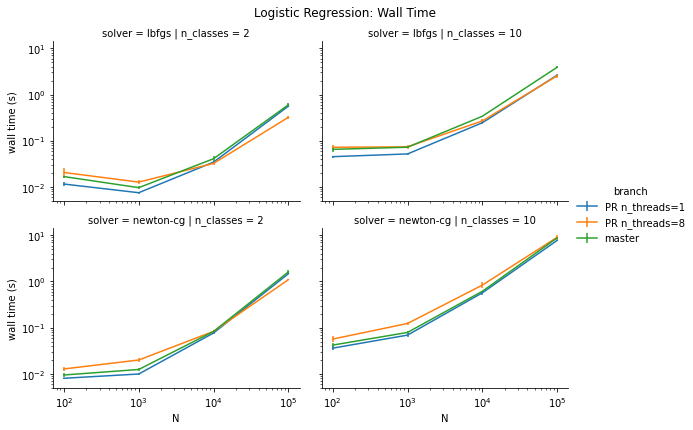

In [3]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Wall Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: CPU Time')

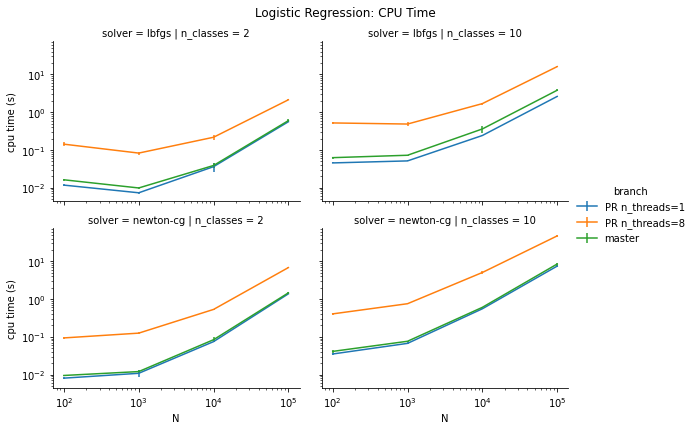

In [4]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: CPU Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: Peak Memory')

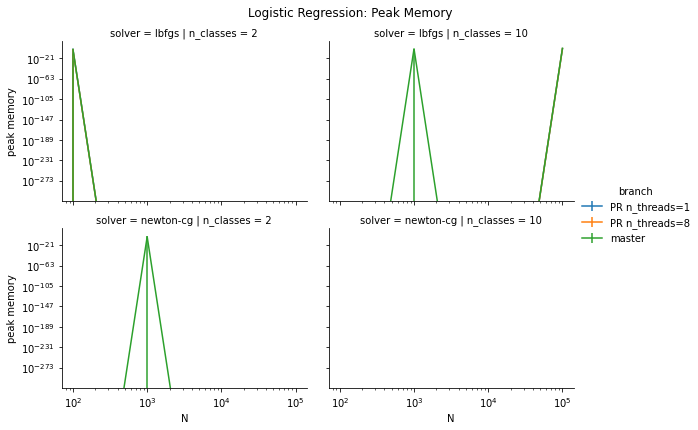

In [5]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Peak Memory", fontsize=12)

Error propagation: $\sigma^2(x/y) \approx \left(\frac{\partial}{\partial x}\frac{x}{y}\right)^2 \sigma_x^2 + \left(\frac{\partial}{\partial y}\frac{x}{y}\right)^2 \sigma_y^2
= \frac{1}{y^2} \sigma_x^2 + \frac{x^2}{y^4} \sigma_y^2 $

In [6]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "solver", "n_classes"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "solver", "n_classes", "branch", "mean", "std"]]
df_plot.head()

,N,solver,n_classes,branch,mean,std
0,100,lbfgs,2,PR n_threads=1,0.688741,0.067066
1,100,lbfgs,2,PR n_threads=8,1.226611,0.291333
2,100,lbfgs,2,master,1.000000,0.074459
3,100,newton-cg,2,PR n_threads=1,0.849085,0.077504
4,100,newton-cg,2,PR n_threads=8,1.352245,0.163332


In [7]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR n_threads=1", 'N'] *= 0.95
df_plot.loc[df_plot["branch"] == "PR n_threads=8", 'N'] *= 1.05

In [ ]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(ylim=(0.5, 1.75))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Ratio of Wall Time: PR compared to master")

## 2. HistGradientBoostingClassifier <a name="chapter_2"></a>
[back to TOC](#toc)

`n_features = 20`

In [ ]:
df = pd.concat([df_HGBT_PR_Threads_6, df_HGBT_MASTER_Threads_6])
df = df.set_index(["n_classes", "branch"], append=True)
df

In [ ]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Wall Time", fontsize=12)

In [ ]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: CPU Time", fontsize=12)

In [ ]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Peak Memory", fontsize=12)

In [ ]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "n_classes"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "n_classes", "branch", "mean", "std"]]
df_plot.head()

In [ ]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR", 'N'] *= 0.95

In [ ]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(ylim=(0.5, 1.5))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Ratio of Wall Time: PR compared to master")